# <font color='maroon'>Confidence Intervals</font>

## Michael NANA KAMENI

On November 23rd, 2017, the average price of a Bitcoin was about 8193.82 USD. The price of Bitcoin is subject to variations so the point estimate will probably not convince you to buy Bitcoin. If the price of Bitcoin dropped, how far down will it drop and are you willing to buy Bitcoin with that amount of variation? Statisticians construct confidence intervals to indicate the range in which the true population parameter will lie. If we are told that the price of Bitcoin is likely to lie in the interval 7500 USD to 8500 USD next month, we would go ahead and buy Bitcoin. But if we're told that the average estimates lies in the interval 6500 USD to 9500 USD, we would hesitate to buy. We hesitate because there is more uncertainty in the wider interval. 

We learn how to construct confidence intervals for the population mean and experiment by generating different confidence intervals for different samples from the same population. We see via this experiment that confidence intervals are subject to variation.

<img src="coindesk-bpi-chart.png"/>
Image courtesy of [coindesk](https://www.coindesk.com/price/).

We construct a confidence interval using the sample mean $\overline{X}$ and standard deviation or standard error $s.e.$ of the mean. The commonly used confidence level associated with confidence intervals is 0.95; so we talk of a 95% confidence interval. This means the probability is 0.95 that the confidence interval will contain the true population value. Conversely, the probability is 0.05 that the interval does not contain the true population value.

The confidence interval is calculated by adding or substracting a margin of error from the sample mean $\overline{X}$, i.e., $$\overline{X} \pm Z * s.e.,$$ where
$Z * s.e.$ is the margin of error given by $ Z∗\dfrac{\sigma}{\sqrt{n}}$. Assuming $\overline{X}$ follows a normal distribution, we calculate the z-value $Z$ as follows, $$Z = (\overline{X} - \mu)/ \dfrac{\sigma}{\sqrt{n}},$$ where $\mu$ is the population mean and $\sigma$ the population standard deviation. 

For more on how to calculate z-scores see [T-Score vs. Z-Score: What’s the Difference?](http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/).

## Constructing the confidence interval

Let's construct the confidence interval for the bitcoin value for November 23rd.

In [1]:
# load your libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rnd
import scipy.stats as stats
import numpy as np
from math import sqrt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('coindesk-bpi-USD-close_data-2017-11-22_2017-11-23.csv', sep=',', index_col='Date')
n = len(df) # number of observations in the dataset

We use the stats.norm.interval() to calculate a 95% confidence interval. We know the mean and standard deviation of the dataset. We use them to calculate the confidence interval.

In [4]:
mean, sigma = np.mean(df), np.std(df)
conf_int = stats.norm.interval(0.95,       # confidence level
                               loc=mean,   # mean
                               scale=sigma/sqrt(n))# error

In [5]:
conf_int

(array([8191.70365972]), array([8195.94356527]))

### Interpreting the confidence level

Our confidence interval was (8191.70365972, 8195.94356527). We can say that we are 95% certain that the interval (8094.14073669, 8293.50648829) contains the population mean, the price of bitcoin.

## Visualizing confidence intervals

The frequency with which the confidence intervals contain the true population mean when an experiment is repeated infinitely many times can be visualised using error bar plots. Let's sample using simple random sampling. Assuming the standard deviation is known (which we calculated from the data set), let's sample 100 times from the bitcoin data set, selecting samples of size 25 each time.

In [6]:
sigma = df.std()  # known standard deviation
intervals = []    # confidence intervals 
sample_means = []
for i in range(0,10):
    sample = np.random.choice(df['Close Price'], size=25)  # take a random sample of size 25 from data
    sample_means.append(np.mean(sample))          # compute the sample mean 
    deviation = sigma / sqrt(len(sample))              # compute part sigma/sqrt(n)
    intervals.append(stats.norm.interval(.95, loc=np.mean(sample), scale=deviation)) # compute the confidence interval

In the above code, we simulate the experiment 100 times, each time selecting sample sizes of 25. Now we calculate create the error bar interval from the `intervals` object.

In [7]:
yerr = []
for i in intervals:
    yerr.append(i[1] - i[0]) # now have two separate numbers

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


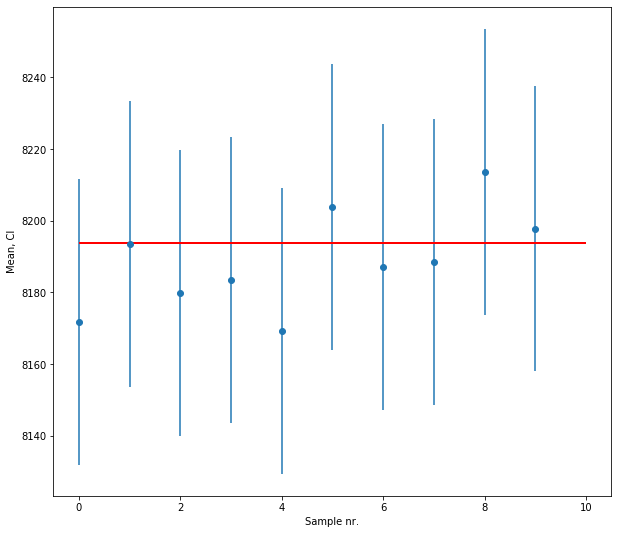

In [8]:
plt.figure(figsize=(10,9))
plt.errorbar(x=np.arange(0,10), 
             y=sample_means,
             yerr=yerr,
            fmt = 'o')
plt.xlabel('Sample nr.')
plt.ylabel('Mean, CI')
plt.hlines(xmin=0, xmax=10,
           y=mean, 
           linewidth=2.0,
           color="red")

#plt.errorbar([0,1,2,3], data_m, yerr=ss.t.ppf(0.95, data_df)*data_sd)

The red horizontal line indicates the true population mean. The vertical bars are the confidence intervals generated from the 10 samples.

For more on plotting confidence intervals and plotting error bars see [Life is a Study](https://hamelg.blogspot.co.za/2015/11/python-for-data-analysis-part-23-point.html).


### Interpreting errorbars

Approximately 95% of the intervals should contain the true value, which is 8193.82 USD, which is indicated as the horizontal red line in the plot. We observe here that the confidence interval is a random quantity, subject to sampling variability. 

### Exercise

Construct 99% confidence intervals similarly to the way we constructed the 95% confidence intervals. Sample from the population. Create an errorbar plot of the confidence intervals.


In [9]:
n =df.shape[0]
sigma = df.std()
sample_mean = []
intervalo =[]
for i in range(0,10):
    sample = np.random.choice(df['Close Price'], size = 30) # take a random sample of close price of size 30.
    sample_mean.append(np.mean(sample)) # Compute the mean of sample and insert in sample_mean
    intervalo.append(stats.norm.interval(0.99, loc = np.mean(df['Close Price']), scale = sigma/sqrt(len(sample)))) # compute the confidence interval

Now we calculate create the error bar interval from the intervals object.

In [10]:
yerro =[]
for i in intervalo:
    yerro.append(i[1]-i[0]) # now have two separate numbers

/Users/michaelnana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


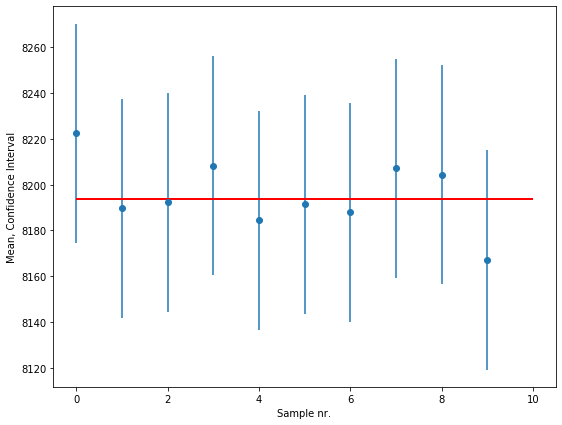

In [11]:
plt.figure(figsize=(9,7))
plt.errorbar(x=np.arange(0,10), y=sample_mean, yerr=yerro, fmt ='o')
plt.xlabel('Sample nr.')
plt.ylabel('Mean, Confidence Interval')

plt.hlines(xmin=0, xmax=10,
           y=mean, 
           linewidth=2.0,
           color="red")